In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#initialize and train decision tree
clf = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)

In [ ]:
#predictions
y_test_pred = clf.predict(X_test)

In [ ]:
#Evaluate model
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=class_names))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



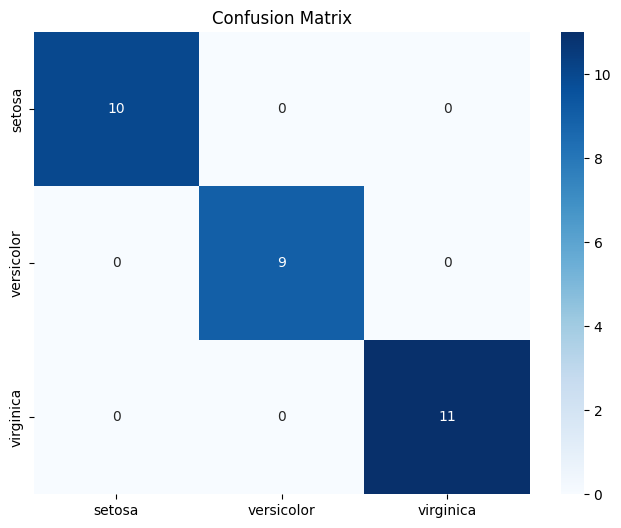

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.show()



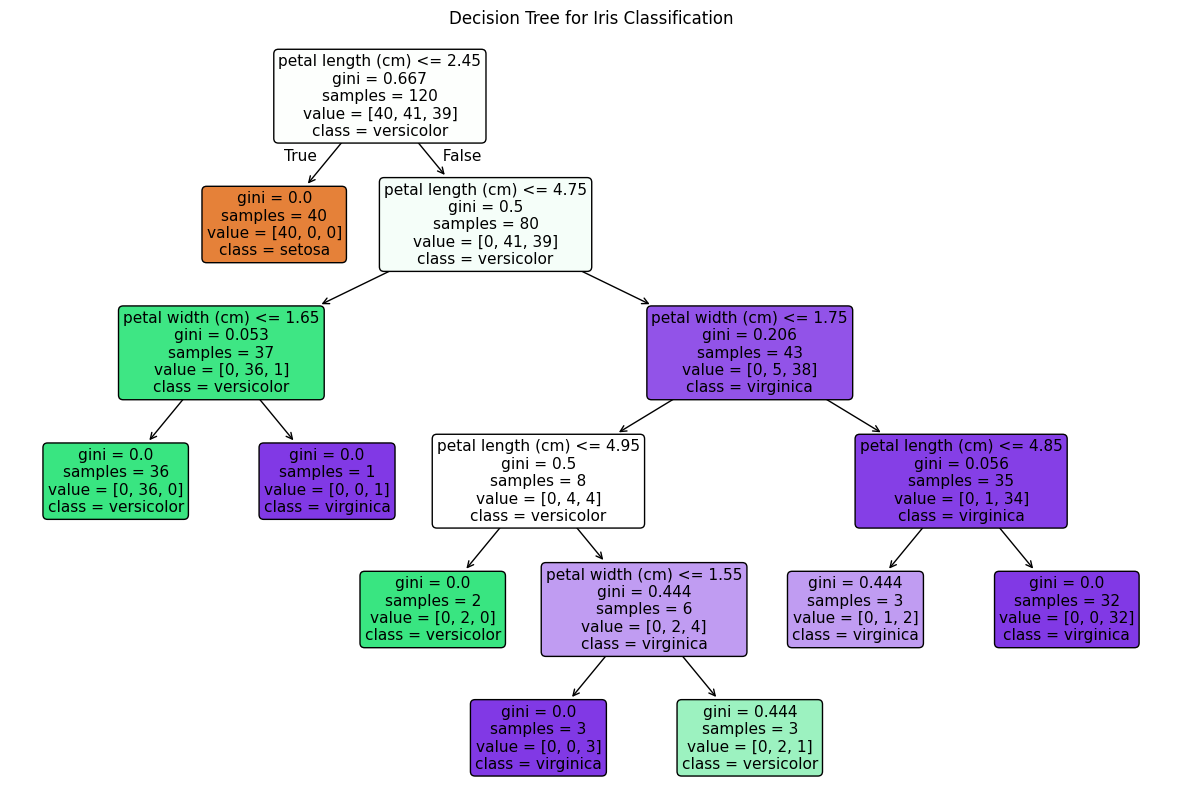

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Iris Classification")
plt.show()

In [ ]:
#feature importance
importance = pd.DataFrame({'feature': feature_names, 'importance': clf.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))

print("\nFeature Importance:", importance)


Feature Importance:              feature  importance
2  petal length (cm)    0.934626
3   petal width (cm)    0.065374
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


<Figure size 1000x600 with 0 Axes>

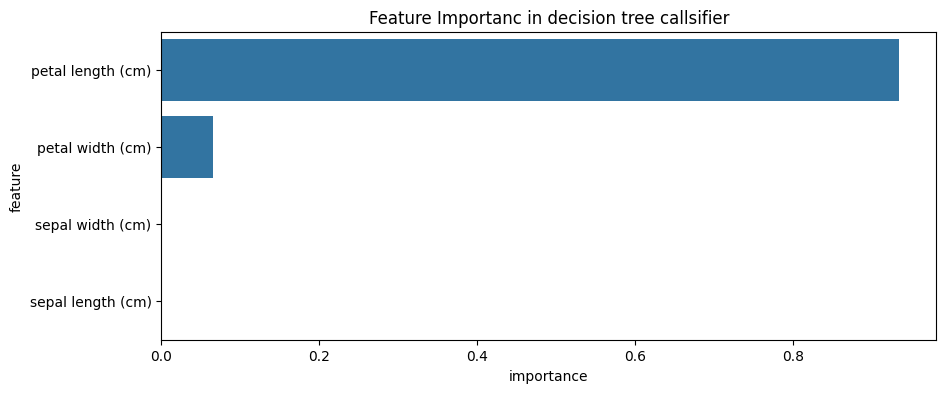

In [ ]:
#plot Feature Importance
plt.figure(figsize=(10,4))
sns.barplot(x='importance', y='feature', data=importance)
plt.title("Feature Importanc in decision tree callsifier")
plt.show()